In [99]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import re
from astropy.io import fits
import os

In [175]:
# Model Opening
model_path = 'NFW+SHEAR'
model_ver = 'NFW_POS+FLUX_SHEAR'

if 'POS+FLUX' in model_ver:
    constraint = 'pos_flux'
elif 'POS' in model_ver:
    constraint = 'pos'


# Load the data
with open(model_path + '/' + model_ver + '_optresult' + '.dat', 'r') as file:
    opt_result = file.readlines()

opt_result


with open(model_path + '/' + constraint + '_point' + '.py', 'r') as file:
    py = file.readlines()

py

['#!/usr/bin/env python\n',
 'import glafic\n',
 '\n',
 "glafic.init(0.3, 0.7, -1.0, 0.7, 'NFW+SHEAR/NFW_POS+FLUX_SHEAR', 20.0, 20.0, 21.56, 21.56, 0.01, 0.01, 1, verb = 0)\n",
 '\n',
 "glafic.set_secondary('chi2_splane 0', verb = 0)\n",
 "glafic.set_secondary('chi2_checknimg 0', verb = 0)\n",
 "glafic.set_secondary('chi2_restart   -1', verb = 0)\n",
 "glafic.set_secondary('chi2_usemag    1', verb = 0)\n",
 "glafic.set_secondary('hvary          0', verb = 0)\n",
 "glafic.set_secondary('ran_seed -122000', verb = 0)\n",
 "glafic.set_secondary('flag_hodensity 2', verb = 0)\n",
 '\n',
 'glafic.startup_setnum(2, 0, 1)\n',
 "glafic.set_lens(1, 'anfw', 0.261343256161012, 1e+12, 20.78, 20.78, 0.1, -4.0, 80.0, 0.0)\n",
 "glafic.set_lens(2, 'pert', 0.261343256161012, 1.0, 20.90, 20.64, 0.1, 140.0, 0.0, 0.0001)\n",
 'glafic.set_point(1, 1.0, 20.78, 20.78)\n',
 '\n',
 'glafic.setopt_lens(1, 0, 1, 1, 1, 1, 1, 1, 0)\n',
 'glafic.setopt_lens(2, 0, 0, 1, 1, 1, 1, 0, 0)\n',
 'glafic.setopt_point(1, 0, 

In [176]:
# Observed Positions 
obs = pd.read_fwf('obs_point/obs_point_(POS+FLUX).dat', header=None, names=['x', 'y', 'm', 'pos_err', 'm_err', 'ex1', 'ex2'], skiprows=1)
obs

plot_obs = obs[['x', 'y', 'm']]
plot_obs['x'] = (plot_obs['x'] - 20) / 0.001
plot_obs['y'] = (plot_obs['y'] - 20) / 0.001
plot_obs

/var/folders/tm/964hg0yn70x0ddsqcj4bsf8r0000gn/T/ipykernel_18245/2689651074.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_obs['x'] = (plot_obs['x'] - 20) / 0.001
/var/folders/tm/964hg0yn70x0ddsqcj4bsf8r0000gn/T/ipykernel_18245/2689651074.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_obs['y'] = (plot_obs['y'] - 20) / 0.001


,x,y,m
0,777.73,302.54,4.27
1,1273.08,956.12,6.80
2,390.91,1050.57,5.98
3,819.81,1259.31,15.30


In [177]:
# Extract the line containing 'glafic.startup_setnum('
startup_setnum_line = next(line for line in py if 'glafic.startup_setnum(' in line)

set_point_line = next(line for line in py if 'glafic.set_point(' in line)

# Extract the first number inside the parentheses
extracted_value = int(re.search(r'glafic\.startup_setnum\((\d+)', startup_setnum_line).group(1))

print(extracted_value)

set_point = int(re.search(r'glafic\.set_point\((\d+)', set_point_line).group(1))

print(set_point)

2
1


In [178]:
# Model Values 
# Find the line containing 'lens   sie' in opt_result
model_input = model_path.lower()
if 'sie' in model_input:
    model_input_1 = 'sie'
if 'nfw' in model_input:
    model_input_1 = 'anfw'
if 'pow' in model_input:
    model_input_1 = 'pow'
if 'c_sie' in model_input:
    model_input_1 = 'sie'
if 'ein' in model_input:
    model_input_1 = 'ein'

print(model_input_1)


lens_sie_line_1 = next(line for line in reversed(opt_result) if 'lens   ' + model_input_1 in line)

print(lens_sie_line_1)

# Extract the values from the line
lens_sie_values_1 = lens_sie_line_1.split()[2:]
lens_sie_values_1 = [str(value) for value in lens_sie_values_1]
lens_sie_values_1

# Find the line containing 'glafic.set_point' in opt_result
set_point_line_1 = next(line for line in reversed(opt_result) if 'point' in line)

print(set_point_line_1)

# Extract the values from the line
set_point_values_1 = set_point_line_1.split()[1:]
set_point_values_1 = [str(value) for value in set_point_values_1]
set_point_values_1


anfw
lens   anfw    0.2613  2.268691e+11  2.081333e+01  2.076800e+01  6.882355e-02  3.531638e+01  7.998061e+01  0.000000e+00 

point  1.0000  2.081152e+01  2.078058e+01 



['1.0000', '2.081152e+01', '2.078058e+01']

In [179]:
if 'SHEAR' in model_path:
    model_input_2 = 'pert'

lens_sie_line_2 = next(line for line in reversed(opt_result) if 'lens   ' + model_input_2 in line)

print(lens_sie_line_2)

# Extract the values from the line
lens_sie_values_2 = lens_sie_line_2.split()[2:]
lens_sie_values_2 = [str(value) for value in lens_sie_values_2]
lens_sie_values_2

lens   pert    0.2613  1.000000e+00  2.074037e+01  2.084955e+01  3.262113e-02  1.503822e+02  0.000000e+00  1.000000e-04 



['0.2613',
 '1.000000e+00',
 '2.074037e+01',
 '2.084955e+01',
 '3.262113e-02',
 '1.503822e+02',
 '0.000000e+00',
 '1.000000e-04']

In [180]:
name = "'Kappa/" + model_path + '/' + model_ver + "'"
name

# Check if the file exists, and create it if it doesn't
file_path = 'Kappa/' + model_path + '/' + model_ver
if not os.path.exists(file_path):
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    with open(file_path, 'w') as f:
        f.write('')  # Create an empty file

In [181]:
model_input_1 = "'" + model_input_1 + "'"
model_input_2 = "'" + model_input_2 + "'"

print(model_input_1)
print(model_input_2)

# Read the existing file contents
with open('kappa_shear_glafic.py', 'r') as f:
    py = f.readlines()

# Update values and write back
with open('kappa_shear_glafic.py', 'w') as glafic_file:
    for line in py:
        if 'glafic.set_lens(1' in line:
            print('Found glafic.set_lens')
            line = f"glafic.set_lens(1, {model_input_1}, {lens_sie_values_1[0]}, {lens_sie_values_1[1]}, {lens_sie_values_1[2]}, {lens_sie_values_1[3]}, {lens_sie_values_1[4]}, {lens_sie_values_1[5]}, {lens_sie_values_1[6]}, {lens_sie_values_1[7]})\n"
        if 'glafic.set_lens(2' in line:
            print('Found glafic.set_lens')
            line = f"glafic.set_lens(2, {model_input_2}, {lens_sie_values_2[0]}, {lens_sie_values_2[1]}, {lens_sie_values_2[2]}, {lens_sie_values_2[3]}, {lens_sie_values_2[4]}, {lens_sie_values_2[5]}, {lens_sie_values_2[6]}, {lens_sie_values_2[7]})\n"
        elif 'glafic.init(' in line:
            line = f"glafic.init(0.3, 0.7, -1.0, 0.7, {name}, 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)\n"
        elif 'glafic.set_point(' in line:
            print('Found glafic.set_point')
            # Ensure values are up to date
            if set_point_values_1 is not None and len(set_point_values_1) == 3:
                line = f"glafic.set_point(1, 1.000, {set_point_values_1[1]}, {set_point_values_1[2]})\n"
            else:
                print("set_point_values is not set correctly.")
        glafic_file.write(line)

'anfw'
'pert'
Found glafic.set_lens
Found glafic.set_lens
Found glafic.set_point


In [182]:
%run kappa_shear_glafic.py

######## writing lens properties
 zs = 1.000000e+00 
 output file name = Kappa/NFW+SHEAR/NFW_POS+FLUX_SHEAR_lens.fits 



In [183]:
x_cent = float(set_point_values_1[1])
y_cent = float(set_point_values_1[2])
print(x_cent, y_cent)

# Predicted Positions 
pred_columns = ['x', 'y', 'mag', 'err']
pred_file = model_path + '/' + model_ver + '_point.dat'
pred = pd.read_fwf(pred_file, sep=' ', header=None, skiprows=1, names=pred_columns)
pred['x_plot'] = (pred['x'] - 20) / 0.001
pred['y_plot'] = (pred['y'] - 20) / 0.001
pred

# Remove the 5th image 
if len(pred) > 4:
    print('Removing the 5th image')
    lowest_mag_index = abs(pred['mag']).idxmin()
    pred = pred.drop(lowest_mag_index)


20.81152 20.78058
Removing the 5th image


In [184]:
# FITS File 
image = 'kappa/' + model_path + '/' + model_ver + '_lens' + '.fits'

hdu_list = fits.open(image)
hdu_list.info()

hdu_list[0].header

Filename: kappa/NFW+SHEAR/NFW_POS+FLUX_SHEAR_lens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (1560, 1560, 8)   float32   


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                 1560 / length of data axis 1                          
NAXIS2  =                 1560 / length of data axis 2                          
NAXIS3  =                    8 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'LINEAR  '                                                            
CTYPE2  = 'LINEAR  '                                                            
CRPIX1  =                    1                                                  
CRPIX2  =                   

In [185]:
# Extract kappa 
kappa = hdu_list[0].data[3]
kappa = np.array(kappa)
kappa


array([[0.1377502 , 0.13789041, 0.13803077, ..., 0.16351885, 0.16335545,
        0.16319218],
       [0.13787776, 0.13801825, 0.13815887, ..., 0.16367988, 0.16351612,
        0.16335247],
       [0.13800544, 0.13814619, 0.13828708, ..., 0.16384104, 0.1636769 ,
        0.1635129 ],
       ...,
       [0.14958803, 0.14973581, 0.14988372, ..., 0.14450336, 0.1443601 ,
        0.14421695],
       [0.14945225, 0.14959973, 0.14974733, ..., 0.14435902, 0.14421606,
        0.14407322],
       [0.14931655, 0.14946373, 0.14961101, ..., 0.14421484, 0.14407216,
        0.14392962]], dtype=float32)

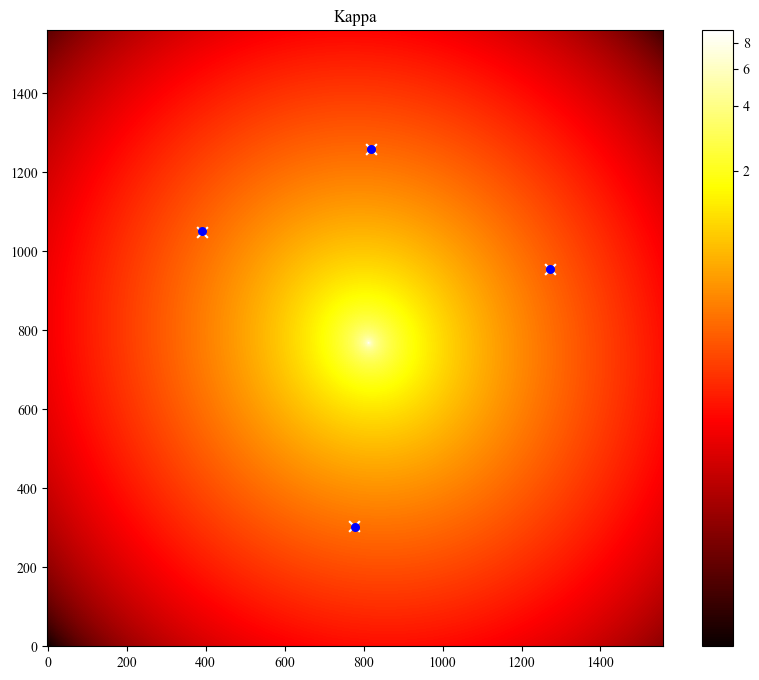

In [186]:
norm = ImageNormalize(stretch=LogStretch())
plt.figure(figsize=(10, 8))
plt.imshow(kappa, cmap='hot', interpolation='nearest', norm=norm)
plt.gca().invert_yaxis()
plt.colorbar()
plt.scatter(pred['x_plot'], pred['y_plot'], c='white', s=60, label='Predicted Positions', marker='x')
plt.scatter(plot_obs['x'], plot_obs['y'], c='blue', s=30, label='Observed Positions', marker='o')
plt.title('Kappa')
plt.show()

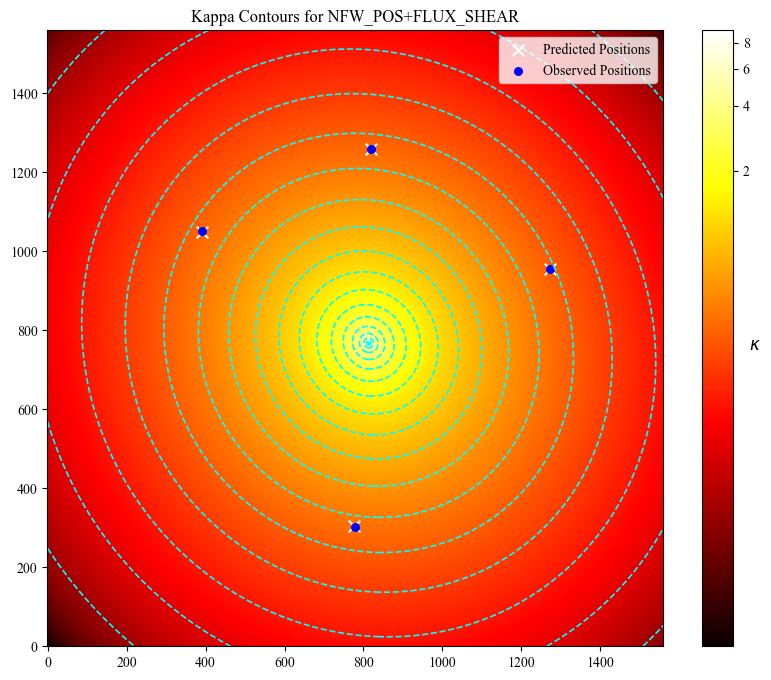

In [187]:
norm = ImageNormalize(kappa, stretch=LogStretch())
plt.figure(figsize=(10, 8))
plt.imshow(kappa, cmap='hot', norm=norm)
plt.gca().invert_yaxis()
cbar = plt.colorbar(label=r'$\kappa$')
cbar.set_label(r'$\kappa$', rotation=0, fontsize=12)

# Logarithmic levels for better distribution
levels = np.logspace(np.log10(kappa.min() + 1e-6), np.log10(kappa.max()), 20)  # Add a small offset to avoid log(0)
contour = plt.contour(
    kappa, 
    levels=levels, 
    colors='cyan', 
    linewidths=1.2, 
    linestyles='dashed',
    alpha=1,
    extent=[0, kappa.shape[1], 0, kappa.shape[0]],
)

# plt.clabel(contour, inline=True, fontsize=8, fmt='%1.2e', colors='cyan')
plt.scatter(pred['x_plot'], pred['y_plot'], c='white', s=70, label='Predicted Positions', marker='x')
plt.scatter(plot_obs['x'], plot_obs['y'], c='blue', s=30, label='Observed Positions', marker='o')
plt.title('Kappa Contours for ' + model_ver)
plt.legend()
plt.show()

In [28]:
# Plot profile 
# Load the data
columns = ['r', 'kappa']
data = pd.read_csv( model_path + '/' + model_ver + '_kaprad.dat', sep=' ', header=None, names=columns)
data2 = pd.read_csv(model_path + '/' + model_ver + '_kapcum.dat', sep=' ', header=None, names=columns)

In [ ]:
# Percet Height

kap_pred = [data2.loc[(data2['r'] - rad).abs().idxmin(), 'kappa'] for rad in pred['rad']]
kap_max = max(data2['kappa'])

percent_height = [kap/kap_max for kap in kap_pred]
percent_height = [ph + 0.001 for ph in percent_height]

inset_percent_height = [ph + 0.68 for ph in percent_height]


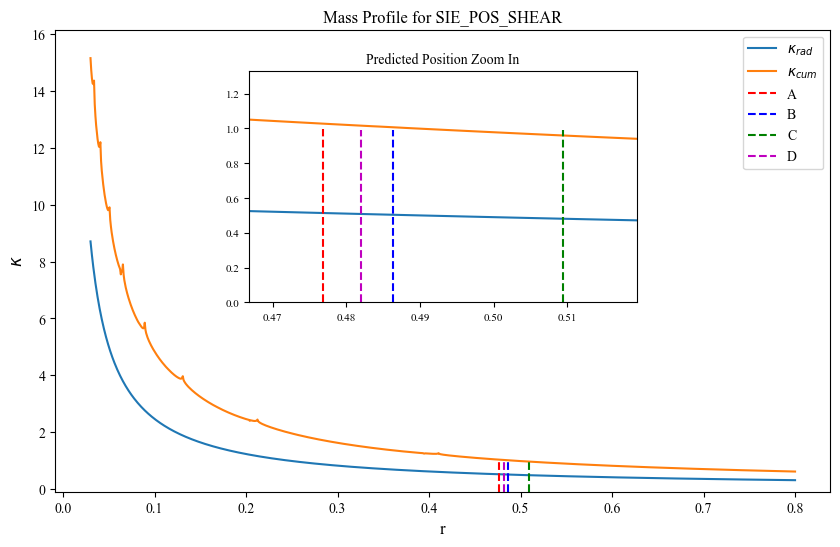

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(data['r'], data['kappa'], label='$\kappa _{rad}$')
plt.plot(data2['r'], data2['kappa'], label='$\kappa _{cum}$')
plt.axvline(x=pred['rad'][0], color='r', linestyle='--', label='A', ymax=percent_height[0], ymin=0)
plt.axvline(x=pred['rad'][1], color='b', linestyle='--', label='B', ymax=percent_height[1], ymin=0)
plt.axvline(x=pred['rad'][2], color='g', linestyle='--', label='C', ymax=percent_height[2], ymin=0)
plt.axvline(x=pred['rad'][3], color='m', linestyle='--', label='D', ymax=percent_height[3], ymin=0)
plt.xlabel('r', fontsize=12)
plt.ylabel('$\kappa$', fontsize=12)
plt.title('Mass Profile for ' + model_ver)
plt.ylim(-0.1, max(data2['kappa']) + 1)
plt.legend()

# Add inset plot
ax_inset = inset_axes(plt.gca(), width="50%", height="50%", loc="upper center", borderpad=3)
ax_inset.plot(data['r'], data['kappa'], label='$\kappa _{rad}$')
ax_inset.plot(data2['r'], data2['kappa'], label='$\kappa _{cum}$')
ax_inset.set_xlim(inset_x_lim_l, inset_x_lim_u)  # Adjust the x-axis range for the inset
ax_inset.set_ylim(0, max(kap_pred) + 0.3)  # Adjust the y-axis range for the inset
ax_inset.axvline(x=pred['rad'][0], color='r', linestyle='--', label='A', ymax=inset_percent_height[0], ymin=0)
ax_inset.axvline(x=pred['rad'][1], color='b', linestyle='--', label='C', ymax=inset_percent_height[1], ymin=0)
ax_inset.axvline(x=pred['rad'][2], color='g', linestyle='--', label='B', ymax=inset_percent_height[2], ymin=0)
ax_inset.axvline(x=pred['rad'][3], color='m', linestyle='--', label='D', ymax=inset_percent_height[3], ymin=0)
ax_inset.set_title('Predicted Position Zoom In', fontsize=10)
ax_inset.tick_params(axis='both', which='major', labelsize=8)

plt.show()

In [ ]:
# Shear Plots
